### Load dependencies and data files

In [9]:
library(data.table)
library(parallel)
load('../../data/genomes/hg38/exonicvsnon_counts.rda') # Probabilities of each mutation type
load('../../data/genomes/hg38/gene_pd_exon.rda') # Load tables giving probability of insertion for each gene in a diploid genome for both genders
source('./src_sompop_v0_2_6.r')
xy_genes <- gene_pd_m$gene_id[gene_pd_m$chrom %in% c('X','Y')] # Getting list of genes on chroms. X and Y by symbol

### Set the file containing a list of driver genes (by Ensembl ID)

In [10]:
geneListFile <- '../../data/gene_lists/drivers_lusc_filt.txt'

In [11]:
### Check the list
# geneList <- read.csv(geneListFile,header=F)
# geneList <- geneList$V1
# gene_pd_m[gene_pd_m$gene_id %in% geneList]

### Define other parameters

In [14]:
###################################################3
# Gender of organism
gender <- 'male'

# Ensembl ID of driver gene disrupted at t=0
driverGene <- ''
driverGene <- 'ENSG00000141510' # TP53

# Initial number of cells
N0 <- 1000

# Average # L1 insertions / cell cycle
mu <- 5

# Selective strengths of each mutation type
spd <- 0.1 # Homozygous driver
spp <- 0.005 # Homozygous passenger
sld <- spd*0.1 # Heterozygous driver
slp <- spp*0.1 # Hetero. passenger

# Number of time steps to simulate
NT <- 1000

####################################################
# Parallel processing (mcmapply())
parallel <- FALSE

# Time resolution: number of generations simulated per timestep (can be < 1)
tau <- 1

# Buffer size of population data object; represents the max possible number of clones in the population
maxNClones <- N0*4
# Log path
logpath <- './log.txt'

## Test run

   user  system elapsed 
  29.93    0.12   30.05 


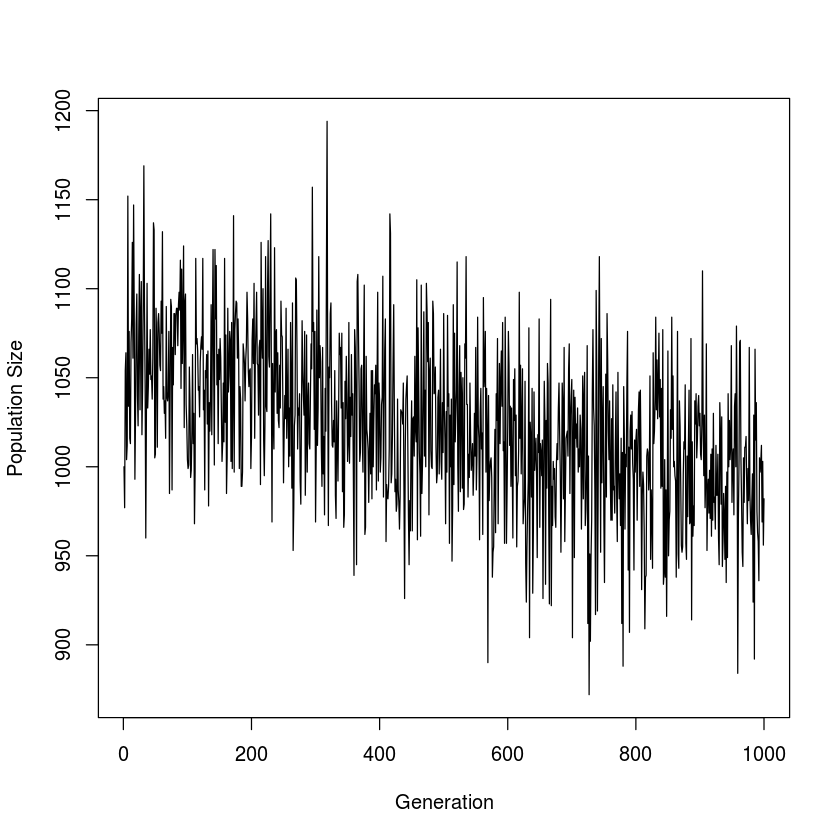

In [15]:
out <- sompop(N0, mu, tau, NT, sld, slp, spd, spp, gender, driverGene, geneListFile, maxNClones, logpath, 'none', parallel)
Pop <- out[[1]]
N <- out[[2]]
genTime <- out[[4]]

# head(Pop)
N[N==0] <- NA
genTime[genTime==0] <- NA
plot(1:NT*tau,N,type='l',xlab='Generation',ylab='Population Size')

## Batch run - random sample conditions

In [ ]:
# # Static parameters
# sd <- .1
# sp <- .005
# hef <- 0.1 # Fraction of homozygous effect assigned to heterozygous mutations
# parallel <- FALSE # Whether to use parallel processing

# nrep <- 10 # Number of replicates for each sampled condition
# Ns <- 100 # Number of random conditions to sample and simulate
# outPath <- '../data/output/test' # Output file
# logPath <- paste0(outPath,'run.log') # Log file
# system(paste0('rm ',logPath))

# nrun <- 0
# tryCatch({

#     for (ii in 1:Ns) {
        
#         # Sample random N0 (10 - 2500)
#         N0 <- sample(seq(10,25e2,10),1)
        
#         # Sample random mu (0.01 - 6)
#         mu <- sample(seq(0.01,6,0.05),1)
        
#         # Perform replicates
#         for (nn in 1:nrep) {
#             nrun <- nrun+1
#             line <- paste0('\nRun: ',toString(nrun),'\tN0: ',toString(N0),'\tmu: ',toString(mu),'\tsd: ',toString(sd),'\tsp: ',toString(sp))
#             write(line,file=logPath,append=TRUE)
#             out <- sompop(N0, mu, tau, NT, sd*hef, sp*hef, sd, sp, gender, driverGene, geneListFile, N0*4, logPath, 'none', parallel)
#             Pop <- out[[1]]
#             N <- out[[2]]
#             mut_genes <- out[[3]]
#             gen_time <- out[[4]]
#             save(N0,mu,Pop,N,mut_genes,gen_time,file=paste0(outPath,'run_n0',N0,'_',nrun,".rda"))
#             rm(Pop,N,mut_genes,gen_time)
#         }
#     }

#     }, warning = function(warn.msg){
#         write(toString(warn.msg), logPath, append=TRUE)
#     }, error = function(err.msg){
#         write(toString(err.msg), logPath, append=TRUE)
#     }
# )